In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vice
from multizone_stars import MultizoneStars
from utils import get_bin_centers

In [2]:
output_name = '/'.join(['gaussian', 'lateburst', 'powerlaw_slope11', 'diskmodel'])
mzs = MultizoneStars.from_output(output_name)
mzs.model_uncertainty(inplace=True)

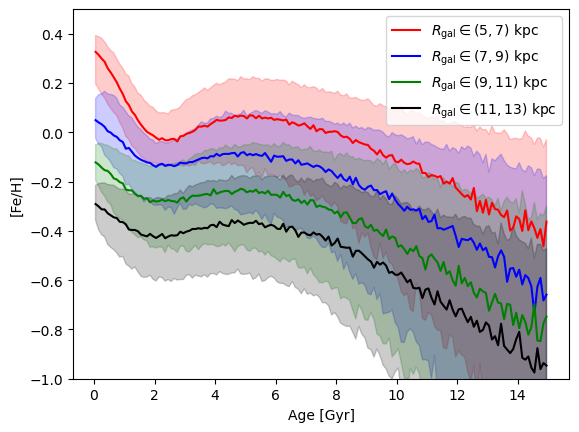

In [3]:
fig, ax = plt.subplots()
rgal_bins = [(5, 7), (7, 9), (9, 11), (11, 13)]
age_bins = np.arange(0, 15.1, 0.1)
colors = ['r', 'b', 'g', 'k']
for i, rgal_lim in enumerate(rgal_bins):
    vice_subset = mzs.region(rgal_lim, (0, 2))
    subset_stars = vice_subset.stars
    binned_age = subset_stars.groupby(pd.cut(subset_stars['age'], age_bins), observed=False)
    # Medians
    feh_medians = binned_age['[fe/h]'].median()
    ax.plot(get_bin_centers(age_bins), feh_medians, color=colors[i], label=r'$R_{\rm gal}\in (%s, %s)$ kpc' % rgal_lim)
    # 1-sigma region
    feh_high = binned_age['[fe/h]'].quantile(0.84)
    feh_low = binned_age['[fe/h]'].quantile(0.16)
    ax.fill_between(get_bin_centers(age_bins), feh_low, feh_high, color=colors[i], alpha=0.2)
ax.legend()
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[Fe/H]')
ax.set_ylim((-1, 0.5))
plt.show()

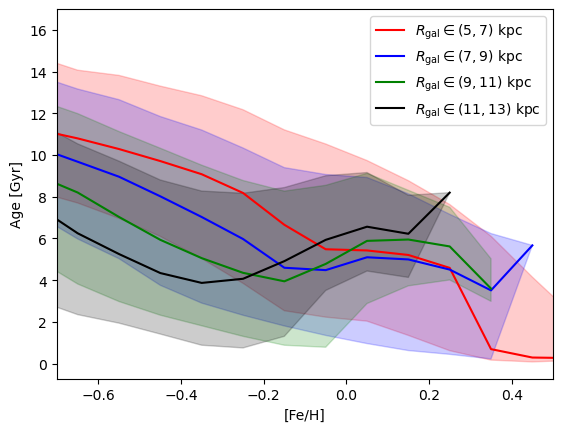

In [4]:
fig, ax = plt.subplots()
rgal_bins = [(5, 7), (7, 9), (9, 11), (11, 13)]
feh_bins = np.arange(-1.5, 0.7, 0.1)
colors = ['r', 'b', 'g', 'k']
for i, rgal_lim in enumerate(rgal_bins):
    vice_subset = mzs.region(rgal_lim, (0, 2))
    subset_stars = vice_subset.stars
    binned_feh = subset_stars.groupby(pd.cut(subset_stars['[fe/h]'], feh_bins), observed=False)
    age_medians = binned_feh['age'].median()
    ax.plot(get_bin_centers(feh_bins), age_medians, color=colors[i], label=r'$R_{\rm gal}\in (%s, %s)$ kpc' % rgal_lim)
    # 1-sigma region
    age_high = binned_feh['age'].quantile(0.84)
    age_low = binned_feh['age'].quantile(0.16)
    ax.fill_between(get_bin_centers(feh_bins), age_low, age_high, color=colors[i], alpha=0.2)
ax.legend()
ax.set_ylabel('Age [Gyr]')
ax.set_xlabel('[Fe/H]')
ax.set_xlim((-0.7, 0.5))
plt.show()